# 6. WTT Stars Spectral Energy Distributions

## 6.1. Notebook setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 6.2. <a href="https://www.dropbox.com/s/q6mdhemp1aymibb/wtt_seds.zip?dl=1">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── HD283572_data.txt
│   ├── HD283572_Ipwr_models.txt
│   ├── HD283572_Ith_models.txt
│   ├── HD283572_Vpwr_models.txt
│   ├── HD283572_Vth_models.txt
│   ├── model_sed_freqs.txt
│   ├── thermal-gs.mplstyle
│   ├── V410Tau_data.txt
│   ├── V410Tau_Ipwr_models.txt
│   ├── V410Tau_Ith_models.txt
│   ├── V410Tau_Vpwr_models.txt
│   ├── V410Tau_Vth_models.txt
│   ├── ...
├── figures
│   ├── HD283572_SED.pdf
│   ├── HD283582_SED.png
│   ├── V410Tau_SED.pdf
│   ├── V410Tau_SED.png
│   ├── ...
├── notebooks
│   ├── wtt_seds.ipynb
│   ├── ...
.
.
.

## 6.3. V410 Tau

### 6.3.1. Load

In [2]:
freqs_model = np.loadtxt('../data/model_sed_freqs.txt').T
Ipwr_models = np.loadtxt('../data/V410Tau_Ipwr_models.txt')
Vpwr_models = np.loadtxt('../data/V410Tau_Vpwr_models.txt')
Ith_models = np.loadtxt('../data/V410Tau_Ith_models.txt')
Vth_models = np.loadtxt('../data/V410Tau_Vth_models.txt')
freqs_obs, I_obs, sI_obs, V_obs, sV_obs = np.loadtxt('../data/V410Tau_data.txt', unpack=True)

plt.style.use('../data/thermal-gs.mplstyle')

### 6.3.2. Plot

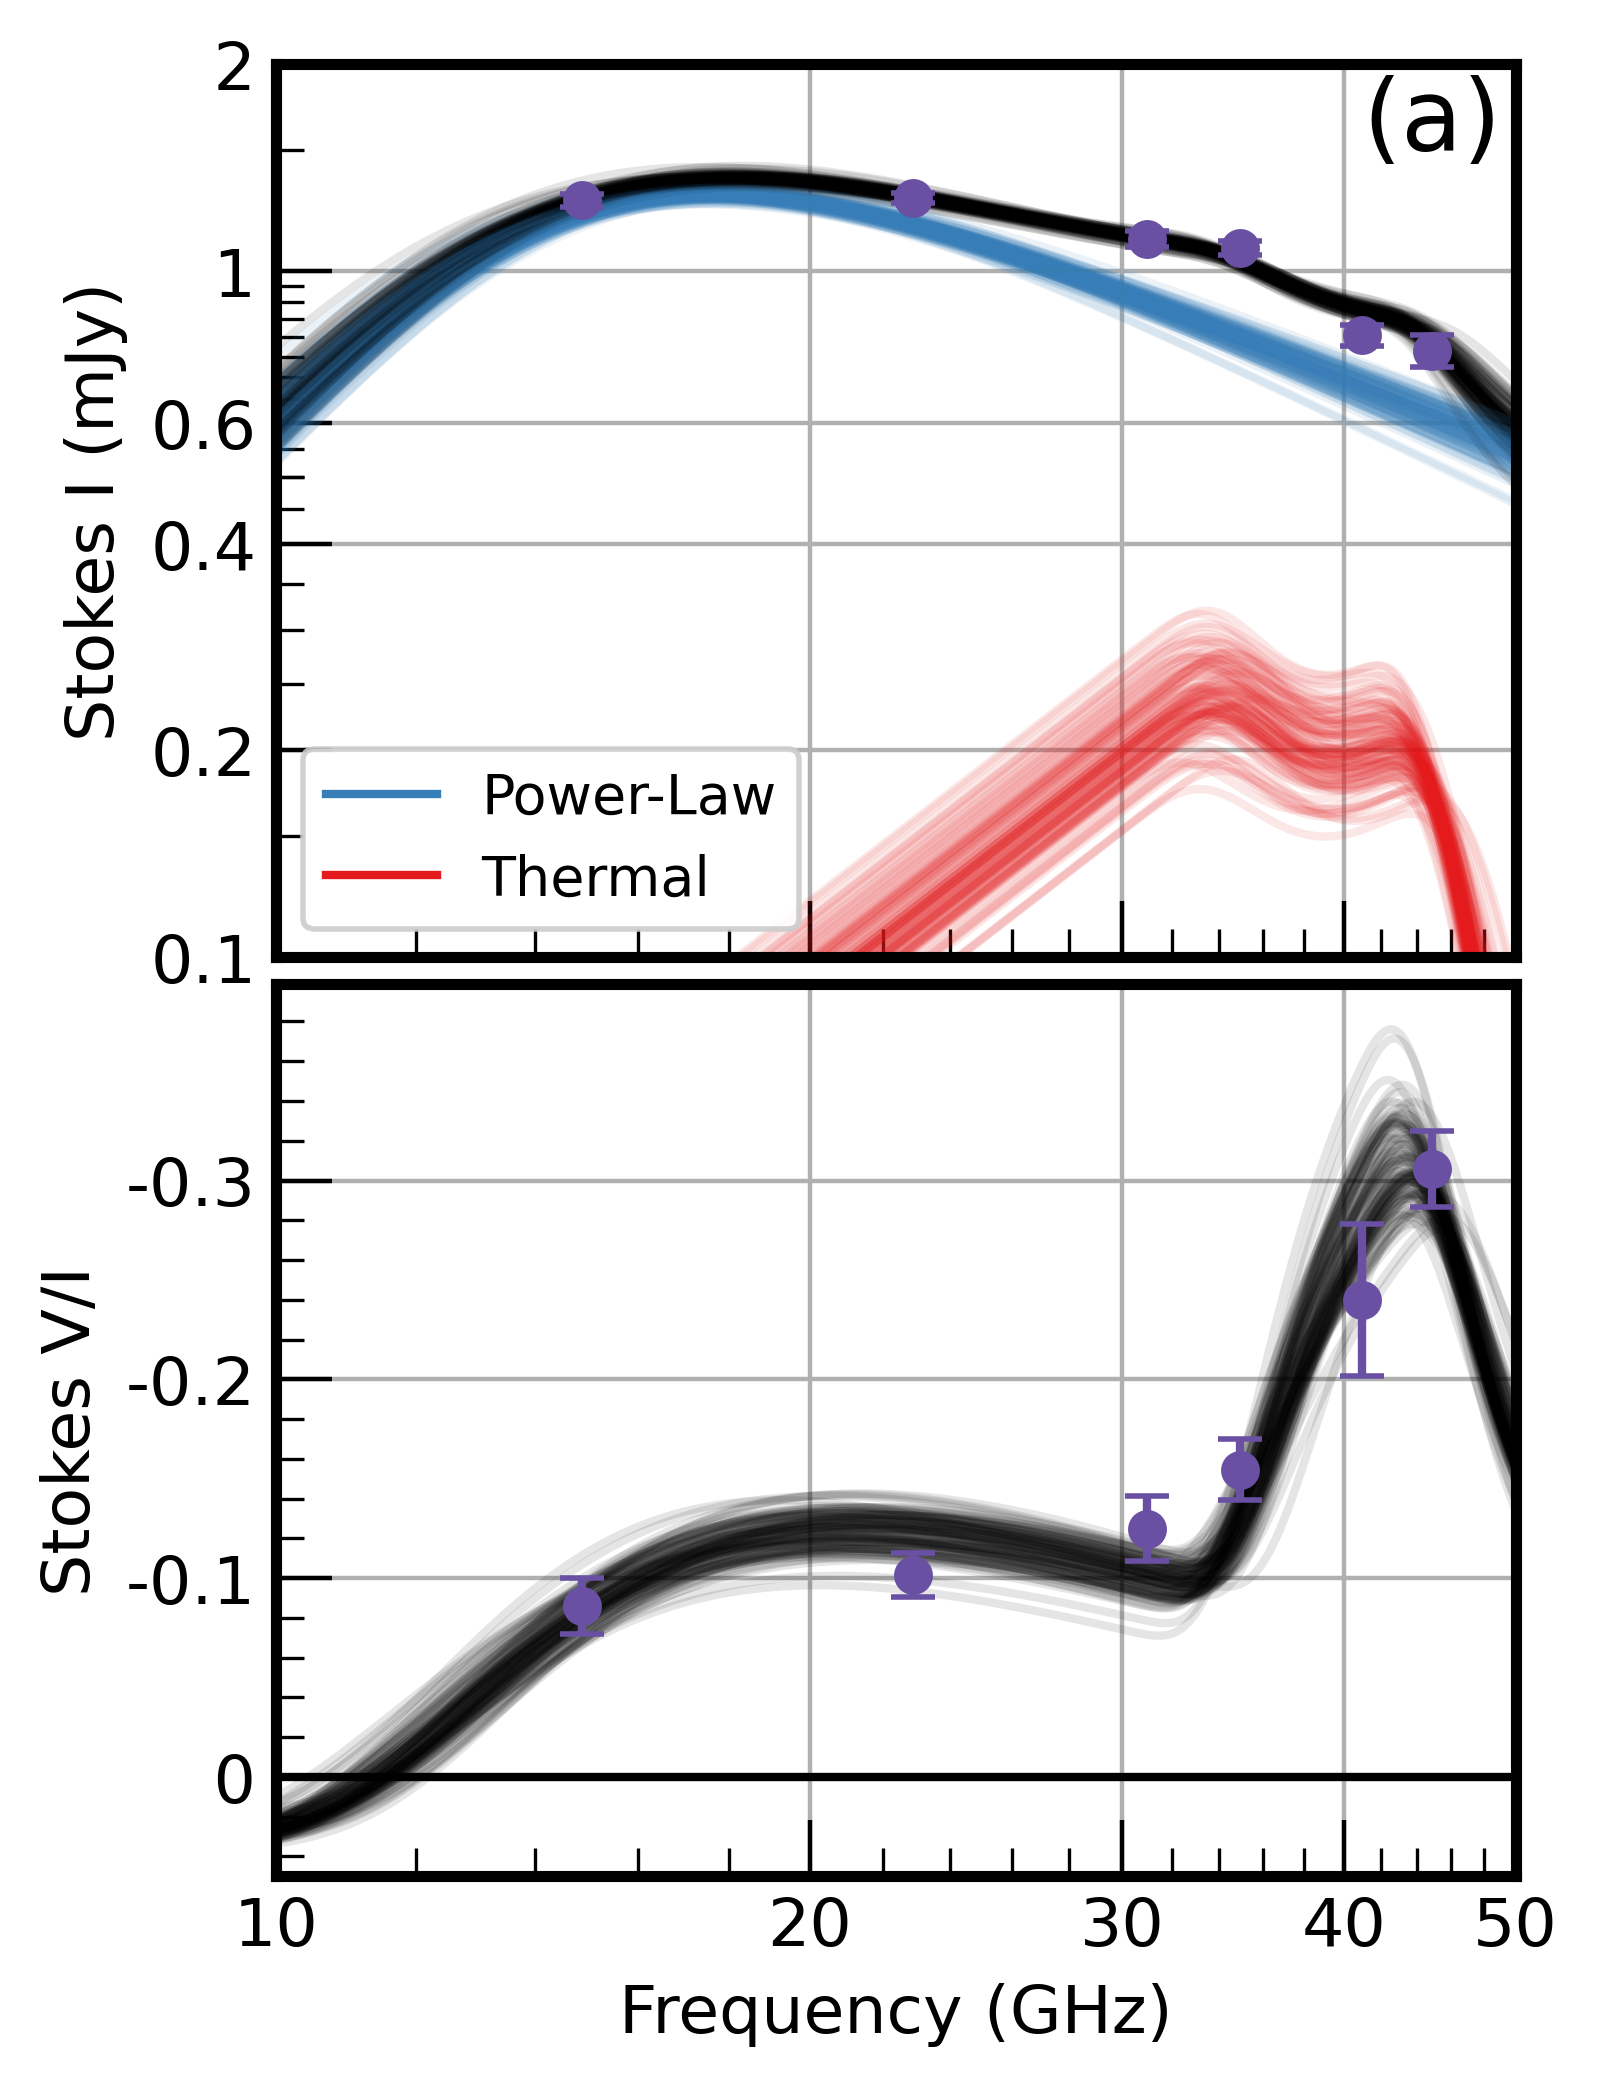

In [3]:
fig,ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)
fig.subplots_adjust(hspace=0.03, wspace=0.3)
cmap = mpl.cm.get_cmap('Purples')

# Stokes I  
ax[0].set_ylabel('Stokes I (mJy)')
ax[0].set_xlim(10, 50)
ax[0].set_ylim(0.1, 2)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[0.2, 0.4, 0.6, 1]))
ax[0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=20, subs=np.arange(1, 20)*0.05))
ax[0].grid()

for i in range(len(Ipwr_models)):
    ax[0].plot(freqs_model, Ipwr_models[i]+Ith_models[i], color='black', alpha=0.1)
    ax[0].plot(freqs_model, Ipwr_models[i], color='C0', alpha=0.1, label='Power-Law')
    ax[0].plot(freqs_model, Ith_models[i], color='C1', alpha=0.1, label='Thermal')
ax[0].errorbar(freqs_obs, I_obs, yerr=sI_obs, marker='o', color=cmap(0.75), linestyle='')

# Stokes V/I
ax[1].axhline(y=0, color='black')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Stokes V/I')
ax[1].set_ylim(0.05, -0.399)

ax[1].set_xscale('log')
ax[1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax[1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax[1].grid()

for i in range(len(Vpwr_models)):
    ax[1].plot(freqs_model, (Vpwr_models[i]+Vth_models[i])/(Ipwr_models[i]+Ith_models[i]), color='black', alpha=0.1)
ax[1].errorbar(freqs_obs, V_obs/I_obs, yerr=np.sqrt((sI_obs/I_obs)**2+(sV_obs/V_obs)**2)*np.abs(V_obs/I_obs), 
    marker='o', color=cmap(0.75), linestyle='')


# Final setup
handles,labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax[0].legend(by_label.values(), by_label.keys(), loc='lower left')
legend.legendHandles[0].set_alpha(1)
legend.legendHandles[1].set_alpha(1)
ax[0].text(41, 1.5, '(a)', fontsize=18) 
fig.set_facecolor('white')
plt.savefig('../figures/V410Tau_SED.png', bbox_inches='tight')
plt.savefig('../figures/V410Tau_SED.pdf', bbox_inches='tight')
plt.show()

## 6.4. HD 283572

### Load

In [4]:
freqs_model = np.loadtxt('../data/model_sed_freqs.txt').T
Ipwr_models = np.loadtxt('../data/HD283572_Ipwr_models.txt')
Vpwr_models = np.loadtxt('../data/HD283572_Vpwr_models.txt')
Ith_models = np.loadtxt('../data/HD283572_Ith_models.txt')
Vth_models = np.loadtxt('../data/HD283572_Vth_models.txt')
freqs_obs, I_obs, sI_obs, V_obs, sV_obs = np.loadtxt('../data/HD283572_data.txt', unpack=True)

### Plot

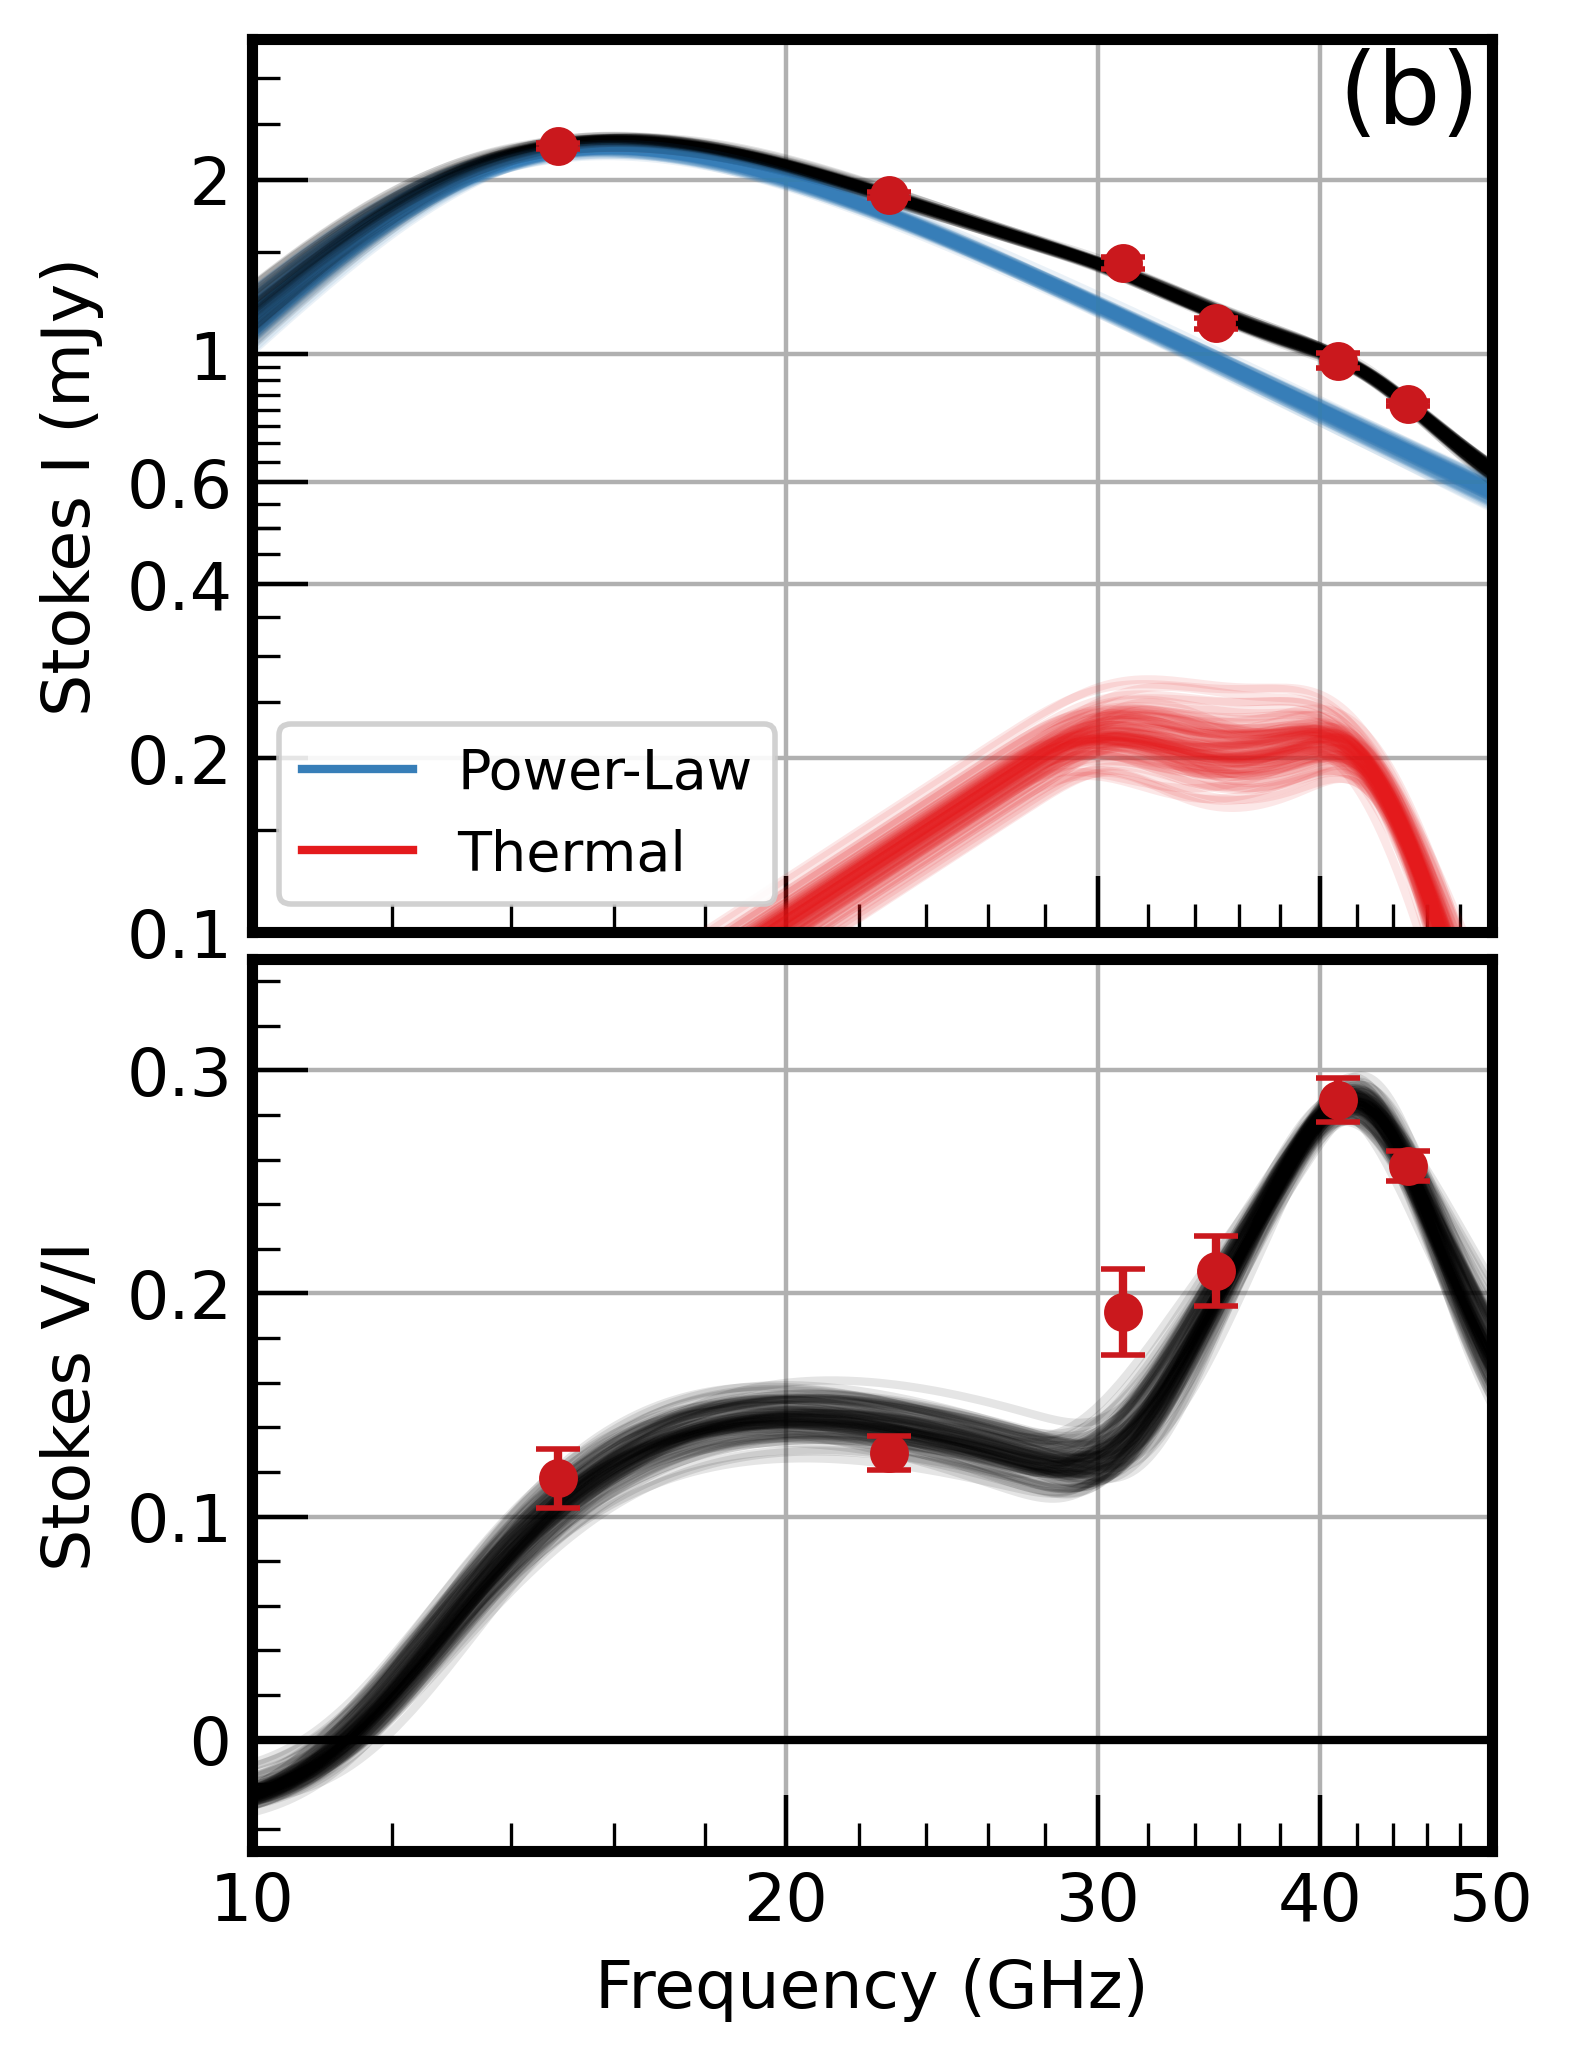

In [5]:
fig,ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)
fig.subplots_adjust(hspace=0.03, wspace=0.3)
cmap = mpl.cm.get_cmap('Reds')

# Stokes I  
ax[0].set_ylabel('Stokes I (mJy)')
ax[0].set_xlim(10, 50)
ax[0].set_ylim(0.1, 3.5)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[0.2, 0.4, 0.6, 1]))
ax[0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=30, subs=np.arange(1, 20)*0.05))
ax[0].grid()

for i in range(len(Ipwr_models)):
    ax[0].plot(freqs_model, Ipwr_models[i]+Ith_models[i], color='black', alpha=0.1)
    ax[0].plot(freqs_model, Ipwr_models[i], color='C0', alpha=0.1, label='Power-Law')
    ax[0].plot(freqs_model, Ith_models[i], color='C1', alpha=0.1, label='Thermal')
ax[0].errorbar(freqs_obs, I_obs, yerr=sI_obs, marker='o', color=cmap(0.75), linestyle='')

# Stokes V/I
ax[1].axhline(y=0, color='black')
ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('Stokes V/I')
ax[1].set_ylim(-0.05, 0.35)

ax[1].set_xscale('log')
ax[1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax[1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax[1].grid()

for i in range(len(Vpwr_models)):
    ax[1].plot(freqs_model, (Vpwr_models[i]+Vth_models[i])/(Ipwr_models[i]+Ith_models[i]), color='black', alpha=0.1)
ax[1].errorbar(freqs_obs, V_obs/I_obs, yerr=np.sqrt((sI_obs/I_obs)**2+(sV_obs/V_obs)**2)*np.abs(V_obs/I_obs), 
    marker='o', color=cmap(0.75), linestyle='')

# Final setup
handles,labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax[0].legend(by_label.values(), by_label.keys(), loc='lower left')
legend.legendHandles[0].set_alpha(1)
legend.legendHandles[1].set_alpha(1)
ax[0].text(41, 2.5, '(b)', fontsize=18) 
fig.set_facecolor('white')
plt.savefig('../figures/HD283572_SED.png', bbox_inches='tight')
plt.savefig('../figures/HD283572_SED.pdf', bbox_inches='tight')
plt.show()